# MNIST dataset image classification

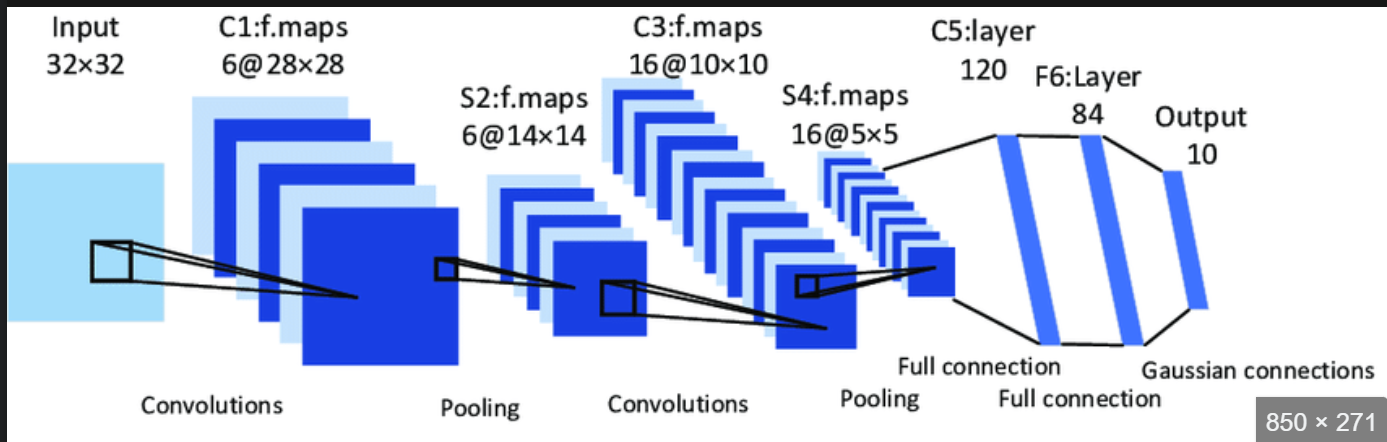

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten
from keras import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.utils import plot_model, to_categorical

!pip install np_utils
#from keras.utils import np_utils

!pip install visualkeras
import visualkeras


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import os, sys
import warnings
warnings.filterwarnings('ignore')

os.getcwd()



from keras.datasets import mnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=e0b6eb6c0ab45a417b6daafdfc7c4f05ffd54d16ba4189297d97ea2df2fe051a
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 14.8 MB/s eta 0:00:00


# Loading Mnist  dataset

In [ ]:
(train_x, y_train),(test_x, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_x.shape, y_train.shape)
print(test_x.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing

In [ ]:
# Preprocessing step - feature scaling
x_train = train_x / 255.0
x_test = test_x / 255.0

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28,28,1)
x_test=x_test.reshape(x_test.shape[0], 28,28,1)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
y_train= to_categorical(y_train, 10) # Ohe
y_test= to_categorical(y_test, 10) # ohe

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


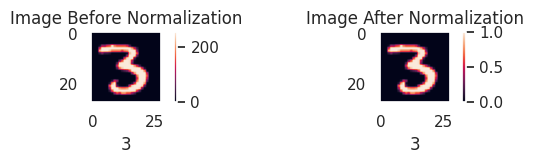

In [ ]:
idx = 12
plt.figure(figsize=(6,1.8))
plt.subplot(1, 2, 1)
plt.imshow(train_x[idx])
class_name = np.argmax(y_train[idx])
plt.xlabel(class_name)
plt.colorbar()
plt.grid(False)
plt.title('Image Before Normalization')

plt.subplot(1,2,2)
plt.imshow(x_train[idx])
class_name = np.argmax(y_train[idx])
plt.xlabel(class_name)
plt.colorbar()
plt.grid(False)
plt.title('Image After Normalization')
plt.tight_layout()
plt.show()

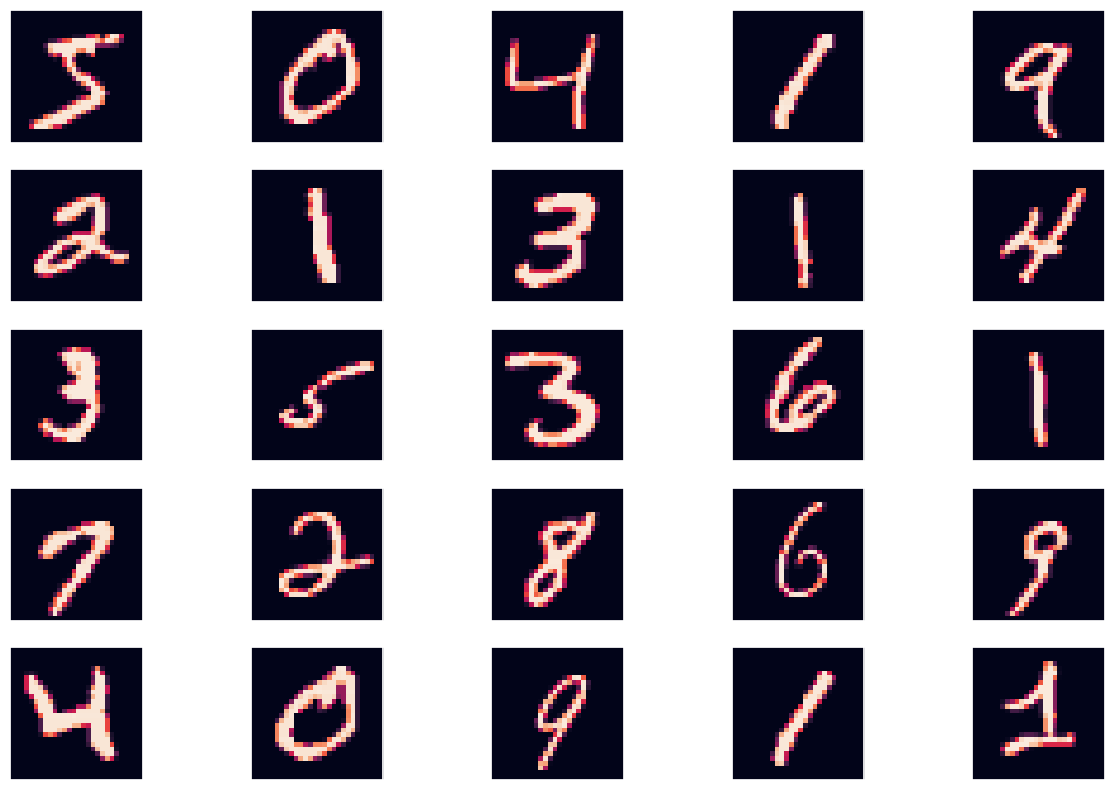

In [ ]:
# Some sample images

plt.figure(figsize=(15,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

#Building LeNet5 Model Trainable with Activation Tanh

In [ ]:
from keras.layers import MaxPooling2D, AveragePooling2D

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

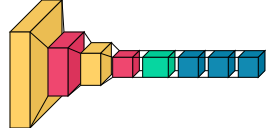

In [ ]:
model=Sequential()

#Convolutional LAyer 1
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', input_shape=(28,28,1)))
#28-5+1> 24*24
#((n-k+2p)/s )+1
# trainable params at layer conv1 are dependent on filter size and # of filter >>>(5*5 + 1 bais) * 6 filters >>156

#Average Pooling LAyer 1
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))
#input is 24*24 , filter is 2*2 ad stride is 2 >> (24-2/2 ) + 1 >> 12*12 > non trainable parameters


#Convolutional LAyer 2
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'))
#input is 12*12 ,
#filetr is 5*5*6(previous pooling layer o/p), stride is 1 and padding is 0
# 12-5+1 >>8*8
# params >(5*5*6)+ 1) *16 >151*16  > 2416 params

#Average Pooling LAyer 2
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))
# input size 8*8
# (8-2/2 )+1 >>>>>>>4*4

##Deep Neural Network

model.add(Flatten())  # 4*4*16>256
model.add(Dense(120, activation='tanh')) # 256*120+120 >>> 30840
model.add(Dense(84, activation='tanh')) # 120*84+84 >>>> 10164

#output layer

model.add(Dense(10, activation='softmax'))

model.summary()
visualkeras.layered_view(model)


In [ ]:
model.compile(optimizer='adam' , loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=10 )


Epoch 1/10
469/469 [==============================] - 14s 6ms/step - loss: 0.3614 - accuracy: 0.8955 - val_loss: 0.1686 - val_accuracy: 0.9499
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1351 - accuracy: 0.9587 - val_loss: 0.1005 - val_accuracy: 0.9695
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.0734 - val_accuracy: 0.9770
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0652 - accuracy: 0.9801 - val_loss: 0.0656 - val_accuracy: 0.9800
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0545 - val_accuracy: 0.9829
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0553 - val_accuracy: 0.9822
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0504 - val_accuracy: 0.9843
Epoch

In [ ]:
# Visualise the output

Text(0.5, 1.0, 'Loss per Epoch')

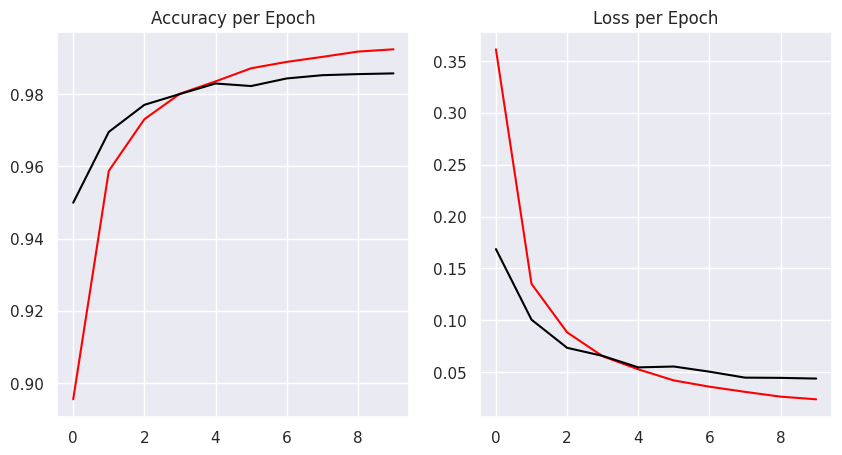

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'], color='red',)
plt.plot(history.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')
plt.title('Loss per Epoch')


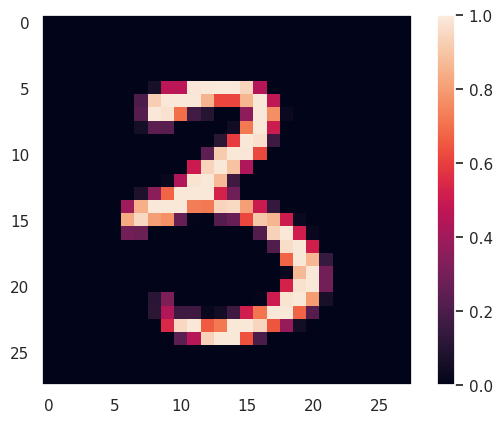

1/1 [==============================] - 0s 33ms/step
Predicted Class 3
Actual Class 3


In [ ]:
#model.predict(test_images[1]).argmax(axis=1)

image_index = 5000
plt.imshow(x_test[image_index].reshape(28, 28,1))
plt.colorbar()
plt.grid(False)
plt.show()
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted Class',pred.argmax())
print('Actual Class',np.argmax(y_test[image_index]))

np.argmax(y_test[image_index])!=pred.argmax()

In [ ]:
def image_evaluation(model, x_test, y_test):
    y_pred_model = model.predict(x_test)
    y_pred = np.argmax(y_pred_model, axis=1)
    y_test=np.argmax(y_test , axis=1)

    fig, axes = plt.subplots(5, 8, figsize=(14, 8))
    for i in range(0, 40):
        plt.subplot(5, 8, i + 1)
        plt.imshow(x_test[i])
        class_name_true = (y_test[i])
        class_name_pred = (y_pred[i])
        plt.title(f'True: {class_name_true}\nPredict: {class_name_pred}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Image Prediction
313/313 [==============================] - 1s 2ms/step


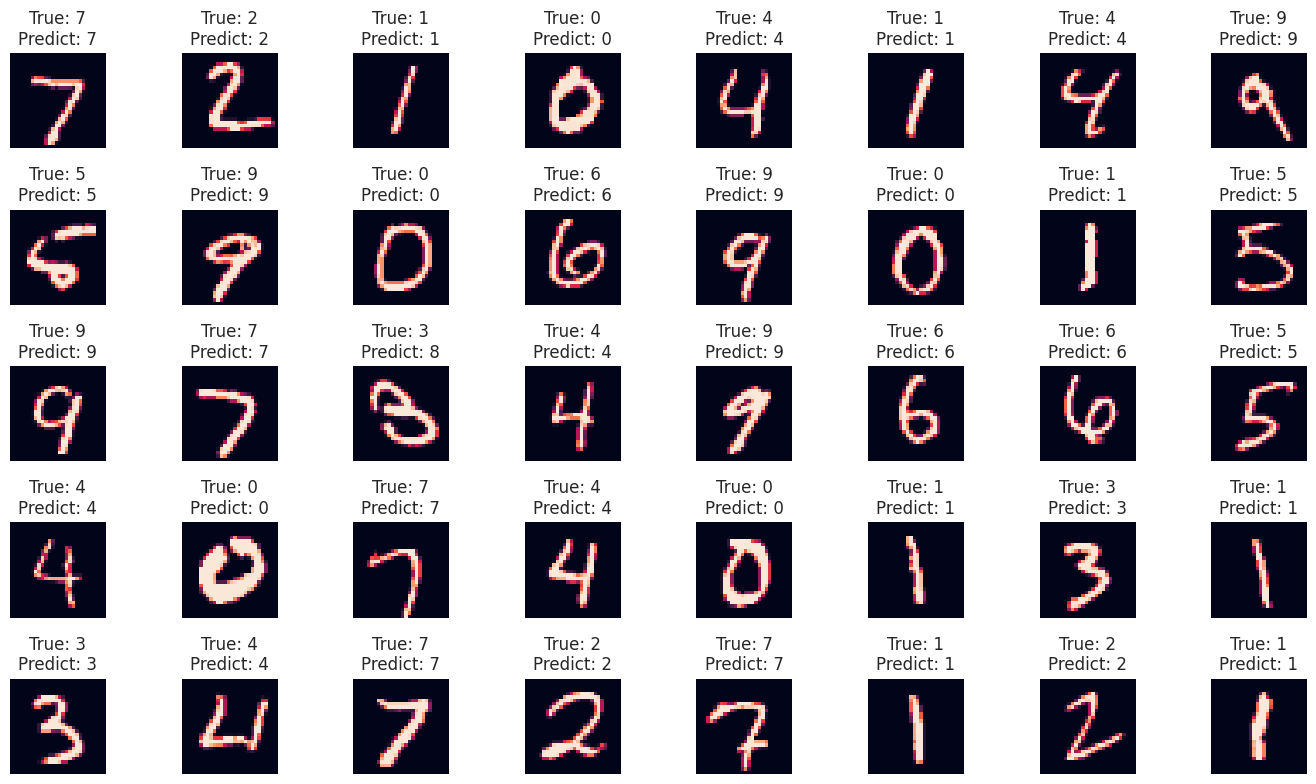

In [ ]:
print("Image Prediction")
image_evaluation(model, x_test, y_test)

# LeNet 5 with Relu and MaxPooling

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

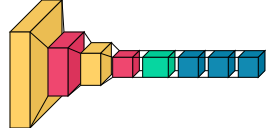

In [ ]:
model1=Sequential()

#Convolutional LAyer 1
model1.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
#28-5+1> 24*24
#((n-k+2p)/s )+1
# trainable params at layer conv1 are dependent on filter size and # of filter >>>(5*5 + 1 bais) * 6 filters >>156

#Average Pooling LAyer 1
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))
#input is 24*24 , filter is 2*2 ad stride is 2 >> (24-2/2 ) + 1 >> 12*12 > non trainable parameters


#Convolutional LAyer 2
model1.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))
#input is 12*12 ,
#filetr is 5*5*6(previous pooling layer o/p), stride is 1 and padding is 0
# 12-5+1 >>8*8
# params >(5*5*6)+ 1) *16 >151*16  > 2416 params

#Average Pooling LAyer 2
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))
# input size 8*8
# (8-2/2 )+1 >>>>>>>4*4

##Deep Neural Network

model1.add(Flatten())  # 4*4*16>256
model1.add(Dense(120, activation='relu')) # 256*120+120 >>> 30840
model1.add(Dense(84, activation='relu')) # 120*84+84 >>>> 10164

#output layer

model1.add(Dense(10, activation='softmax'))

model1.summary()
visualkeras.layered_view(model1)


In [ ]:
model1.compile(optimizer='adam' , loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history1=model1.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=10 )


Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0269 - val_accuracy: 0.9916
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0345 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0369 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch

Text(0.5, 1.0, 'Loss per Epoch')

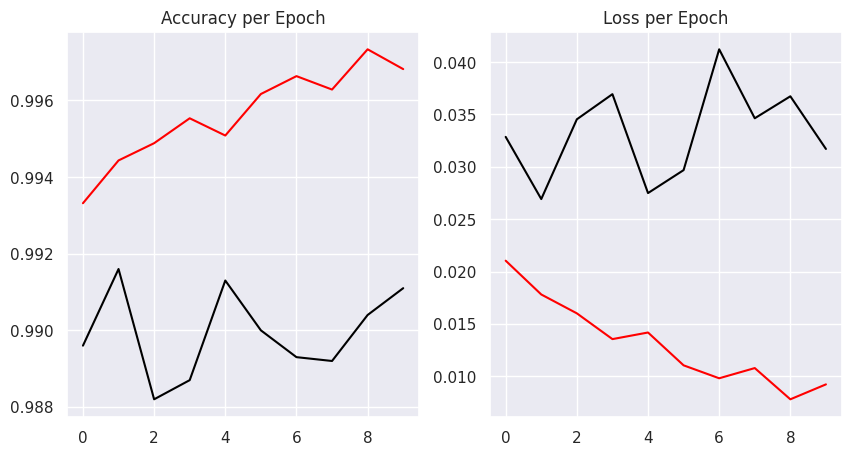

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history1.history['accuracy'], color='red',)
plt.plot(history1.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history1.history['loss'], color='red')
plt.plot(history1.history['val_loss'], color='black')
plt.title('Loss per Epoch')


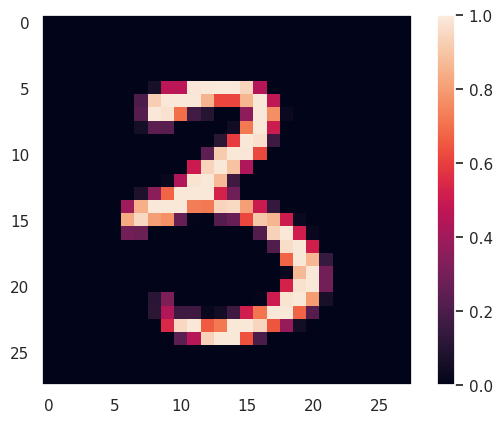

1/1 [==============================] - 0s 123ms/step
Predicted Class 3
Actual Class 3


In [ ]:
#model.predict(test_images[1]).argmax(axis=1)

image_index = 5000
plt.imshow(x_test[image_index].reshape(28, 28,1))
plt.colorbar()
plt.grid(False)
plt.show()
pred = model1.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted Class',pred.argmax())
print('Actual Class',np.argmax(y_test[image_index]))

#np.argmax(y_test[image_index])!=pred.argmax()

In [ ]:
def image_evaluation(model, x_test, y_test):
    y_pred_model = model1.predict(x_test)
    y_pred = np.argmax(y_pred_model, axis=1)
    y_test=np.argmax(y_test , axis=1)

    fig, axes = plt.subplots(5, 8, figsize=(14, 8))
    for i in range(0, 40):
        plt.subplot(5, 8, i + 1)
        plt.imshow(x_test[i])
        class_name_true = (y_test[i])
        class_name_pred = (y_pred[i])
        plt.title(f'True: {class_name_true}\nPredict: {class_name_pred}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Image Prediction
313/313 [==============================] - 1s 2ms/step


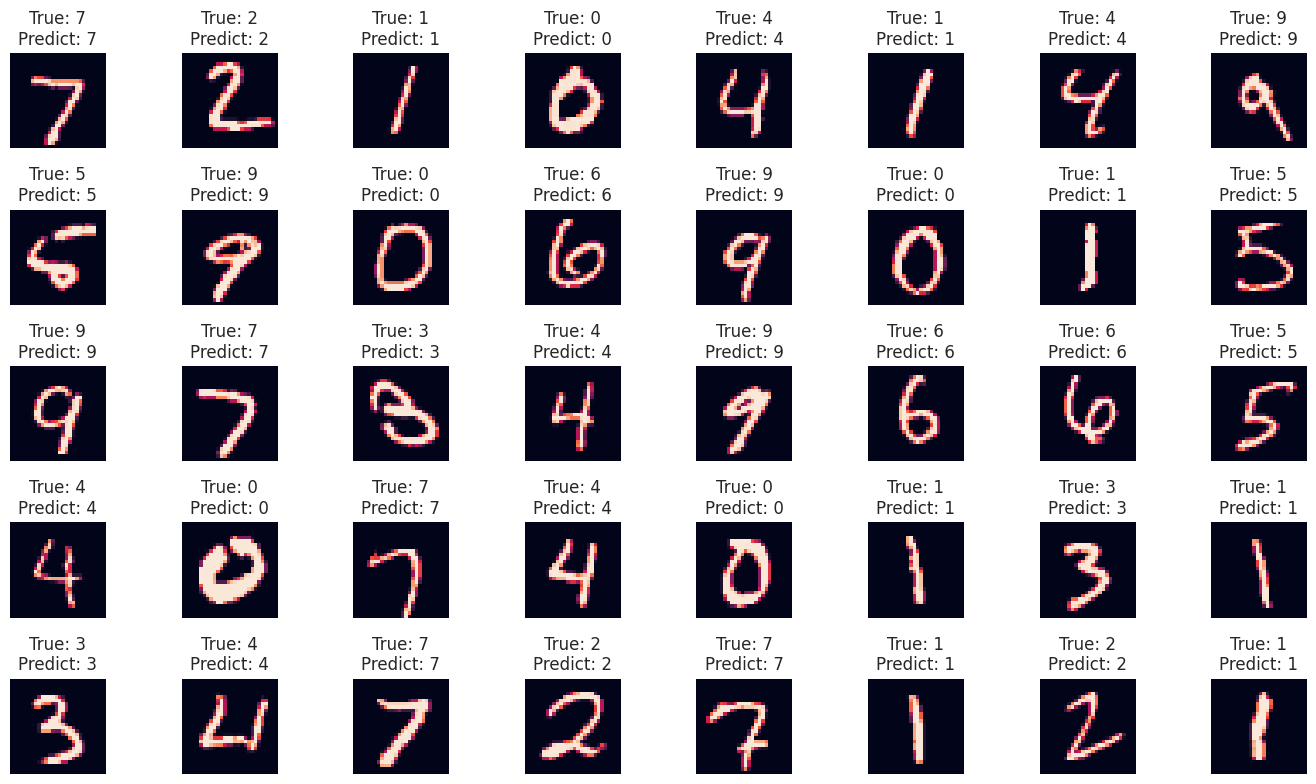

In [ ]:
print("Image Prediction")
image_evaluation(model, x_test, y_test)